# Final Data Cleaning and Visualizations

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import csv 
import gzip
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [4]:
# Reading in our df
df1 = pd.read_csv('our_data.csv')
df1

,Unnamed: 0,Movie Title,Genre,tconst,Runtime (min),IMDB Rating,Worldwide Box Office (USD),Domestic Box Office (USD),budget,release_date,popularity
0,0,Star Wars: Episode VII - The Force Awakens,"Action, Adventure, Sci-Fi",tt2488496,136.0,8.0,2068223624,936662225,245000000.0,2015-12-15,40.452
1,1,Avengers: Endgame,"Action, Adventure, Drama",tt4154796,181.0,8.8,2797800564,858373000,356000000.0,2019-04-24,41.244
2,2,Black Panther,"Action, Adventure, Sci-Fi",tt1825683,134.0,7.3,1346913161,700059566,200000000.0,2018-02-13,41.152
3,3,Avengers: Infinity War,"Action, Adventure, Sci-Fi",tt4154756,149.0,8.5,2048359754,678815482,300000000.0,2018-04-25,66.376
4,4,Jurassic World,"Action, Adventure, Sci-Fi",tt0369610,124.0,7.0,1670400637,652270625,150000000.0,2015-06-06,36.934
...,...,...,...,...,...,...,...,...,...,...,...
4039,4069,Policeman,Documentary,tt1978447,105.0,6.2,38263,7379,0.0,2011-07-09,2.755
4040,4070,Big Words,"Comedy, Drama",tt2339379,93.0,5.9,8965,7371,0.0,2013-07-12,1.400
4041,4071,False Confessions,"Comedy, Drama",tt8178396,91.0,8.3,56165,7361,0.0,2018-03-17,4.316
4042,4072,The Dry Land,Drama,tt1322264,92.0,5.6,11777,7351,0.0,2010-07-30,2.594


In [5]:
# We decided to drop the columns with 0 budget; it is most likely that the budgets were just not reported for our smaller grossing films 
df2 = df1[df1['budget'] !=0]
df_drop = df2.drop(columns=['Unnamed: 0'])

# Saving df as csv and reading it 
df_drop.to_csv('movie_data.csv')
df3 = (pd.read_csv('movie_data.csv')).drop(columns=['Unnamed: 0'])

# Adding profit column 
df3['Profit'] = df3['Worldwide Box Office (USD)'] - df3['budget']
df3 = df3.astype({'Profit': 'int'})

# Adding release month column 
df3['release_month_num'] = pd.DatetimeIndex(df3['release_date']).month
df3

,Movie Title,Genre,tconst,Runtime (min),IMDB Rating,Worldwide Box Office (USD),Domestic Box Office (USD),budget,release_date,popularity,Profit,release_month_num
0,Star Wars: Episode VII - The Force Awakens,"Action, Adventure, Sci-Fi",tt2488496,136.0,8.0,2068223624,936662225,245000000.0,2015-12-15,40.452,1823223624,12
1,Avengers: Endgame,"Action, Adventure, Drama",tt4154796,181.0,8.8,2797800564,858373000,356000000.0,2019-04-24,41.244,2441800564,4
2,Black Panther,"Action, Adventure, Sci-Fi",tt1825683,134.0,7.3,1346913161,700059566,200000000.0,2018-02-13,41.152,1146913161,2
3,Avengers: Infinity War,"Action, Adventure, Sci-Fi",tt4154756,149.0,8.5,2048359754,678815482,300000000.0,2018-04-25,66.376,1748359754,4
4,Jurassic World,"Action, Adventure, Sci-Fi",tt0369610,124.0,7.0,1670400637,652270625,150000000.0,2015-06-06,36.934,1520400637,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1793,[REC] 3: Genesis,"Action, Sci-Fi",tt1649444,80.0,5.0,10998667,8973,6400000.0,2012-03-30,9.405,4598667,3
1794,Falcon Rising,"Action, Drama, Game-Show",tt2295722,103.0,5.8,267476,8691,4500000.0,2014-09-05,9.934,-4232524,9
1795,Nothing Left to Fear,Drama,tt1662293,100.0,4.4,1675381,7886,3000000.0,2013-09-26,7.939,-1324619,9
1796,Iceman,"Comedy, Drama, Music",tt2557256,104.0,4.8,6719,7679,25477000.0,2014-04-17,6.716,-25470281,4


In [4]:
# creating a dictionary of genre : count
genre_list = []
for genres in df3['Genre']:
    genre_list.extend(genre.strip() for genre in genres.split(','))
    genre_dict = {}
    for genre in genre_list:
        if genre in genre_dict:
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1
# creating df 
genres = {'Genre': list(genre_dict.keys()), 'Count': list(genre_dict.values())}
genre_df = pd.DataFrame(genres)
sorted_genres = genre_df.sort_values(by='Count',ascending=False)
sorted_genres

,Genre,Count
3,Drama,894
8,Comedy,632
0,Action,508
1,Adventure,402
13,Thriller,276
15,Romance,248
10,Crime,245
11,Biography,179
12,Horror,153
9,Mystery,139


In [5]:
# Question 1
# Visualization of top box office movies by genre 

x = list(sorted_genres['Genre'])
y = list(sorted_genres['Count'])


fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x,y)

ax.set_xticklabels(x,rotation=80)
ax.set_ylabel("Count of Movies")
ax.set_title("Top Box Office Movies by Genre (2010-2019)")

plt.savefig('fig2.png')

NameError: name 'sorted_genres' is not defined

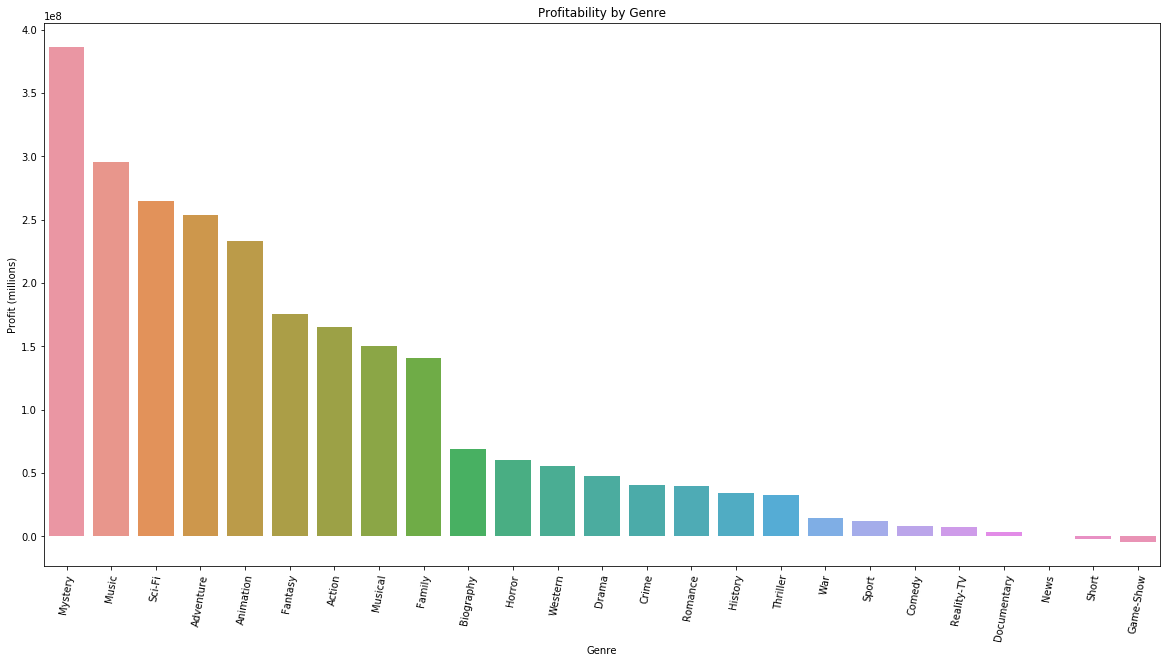

In [6]:
# Question 1 
# Looking at profitability by genre after dropping our null budget values 

df_pg = pd.read_csv('profit_genre_chart.csv')
df_byprofit = df_pg.sort_values(by='profit',ascending=False)

x = (df_byprofit['Genre'])
y = (df_byprofit['profit'])


fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x,y)
sns.barplot(x,y)

ax.set_xticklabels(x,rotation=80)
ax.set_ylabel("Profit (millions)")
ax.set_title("Profitability by Genre")


plt.savefig('fig_profitgenre.png')

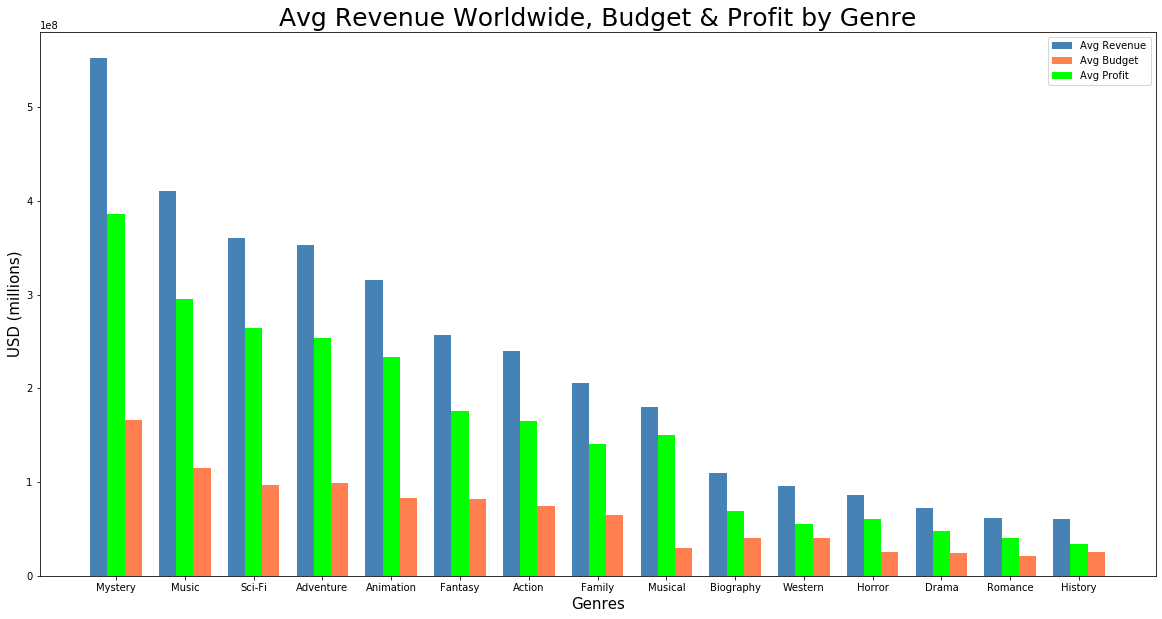

In [12]:
# Question 1 cont.
# Avg revenue, budget and profit by genre
df_top =df_pg.sort_values(by=['revenue_avg_World'], ascending=False)
df_top.reset_index(drop=True, inplace=True)
df_top=df_top.head(15)
df_top

labels = df_top['Genre']
revenue =df_top['revenue_avg_World']
budget = df_top['budget_avg']
profit = df_top['profit']
x = np.arange(len(labels))
width = 0.25  
fig, ax = plt.subplots(figsize=(20, 10))
bar1 = ax.bar(x + 0.00, revenue, width, label='Avg Revenue', color= 'steelblue')
bar2 = ax.bar(x + 0.5, budget, width, label='Avg Budget', color='coral')
bar3 = ax.bar(x + 0.25, profit, width, label='Avg Profit', color='lime')
ax.set_ylabel('USD (millions)', fontsize=(15))
ax.set_xlabel('Genres', fontsize=(15))
ax.set_title('Avg Revenue Worldwide, Budget & Profit by Genre', fontsize=(25))
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('fig_revenuebudgetprofit.png')

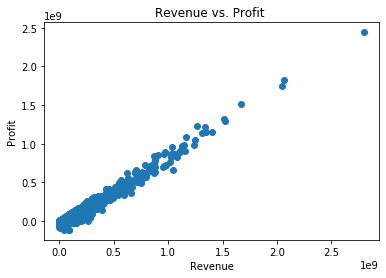

In [13]:
# Supplement to Question 1 
# scatterplot 
fig, ax = plt.subplots()

ax.set_title('Revenue vs. Profit ')
ax.set_xlabel('Revenue')
ax.set_ylabel('Profit')

x = df3['Worldwide Box Office (USD)']
y = df3['Profit']

ax.scatter(x, y)


plt.savefig('scatterplot.png')

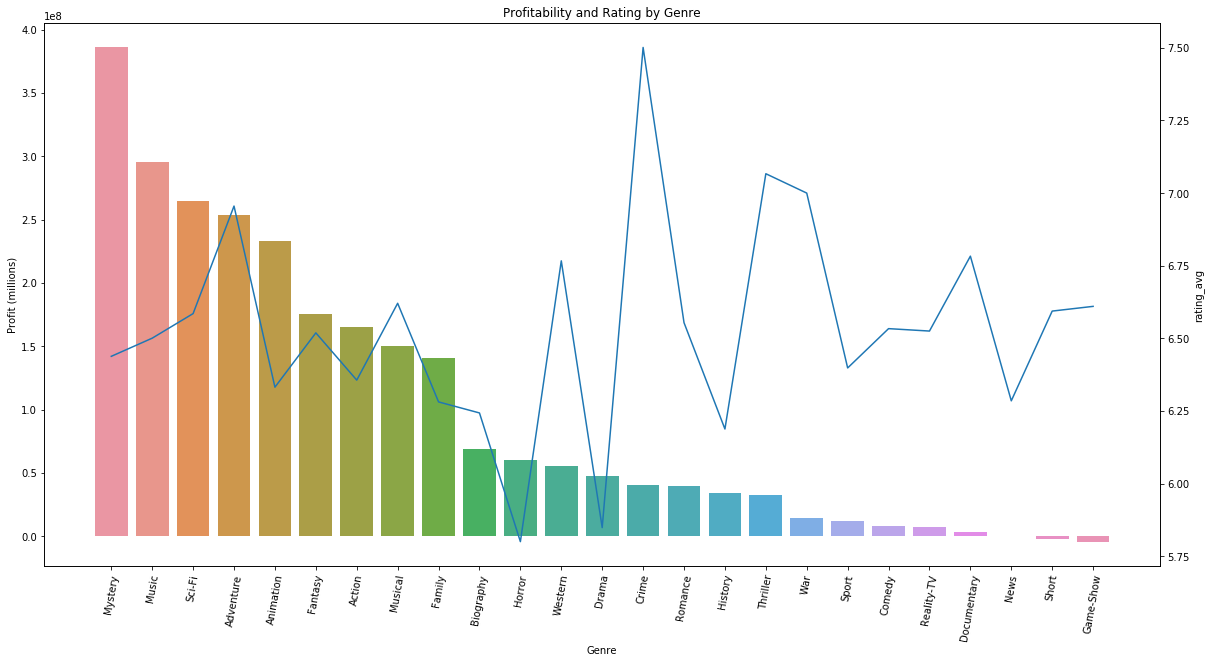

In [17]:
# Question 2 
# Profitability of each genre and ratings across to get a sense of how Rating relates with performance
df_r = pd.read_csv('rating_data.csv')

df5 = df_r.sort_values(by=['profit'], ascending=False)

x = df5['Genre']
y = df5['profit']
y2= df5['rating_avg']
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x,y)
ax2 =ax.twinx()
sns.lineplot(x,y2)
ax.set_xticklabels(x,rotation=80)
ax.set_ylabel('Profit (millions)')
ax.set_title("Profitability and Rating by Genre")
plt.savefig('fig_profitratings.png')

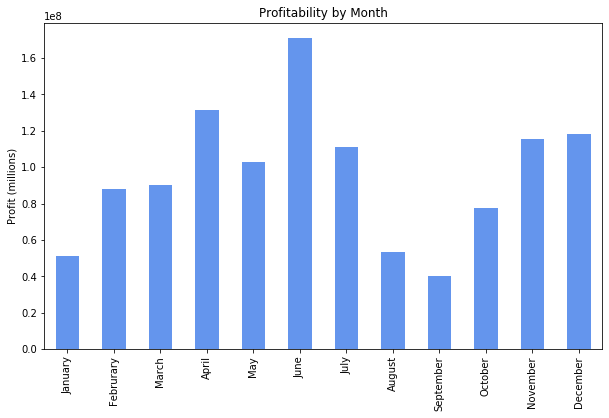

In [18]:
# Question 3 
# Bar chart showing profitability and release month 

df_bymonth = df3.sort_values(by= 'release_month_num')
months = df_bymonth.groupby(df_bymonth['release_month_num'])
month_data = months['Profit'].mean()


plt.figure(figsize=(10,6))
fig = month_data.plot(kind='bar',color=['cornflowerblue'])

                      
fig.set_title('Profitability by Month')
fig.set_ylabel('Profit (millions)')
fig.set_xlabel('')
x_labels = ['January','Februrary','March','April','May','June','July','August','September','October','November','December']
fig.set_xticklabels(x_labels);

plt.savefig('fig_months.png')



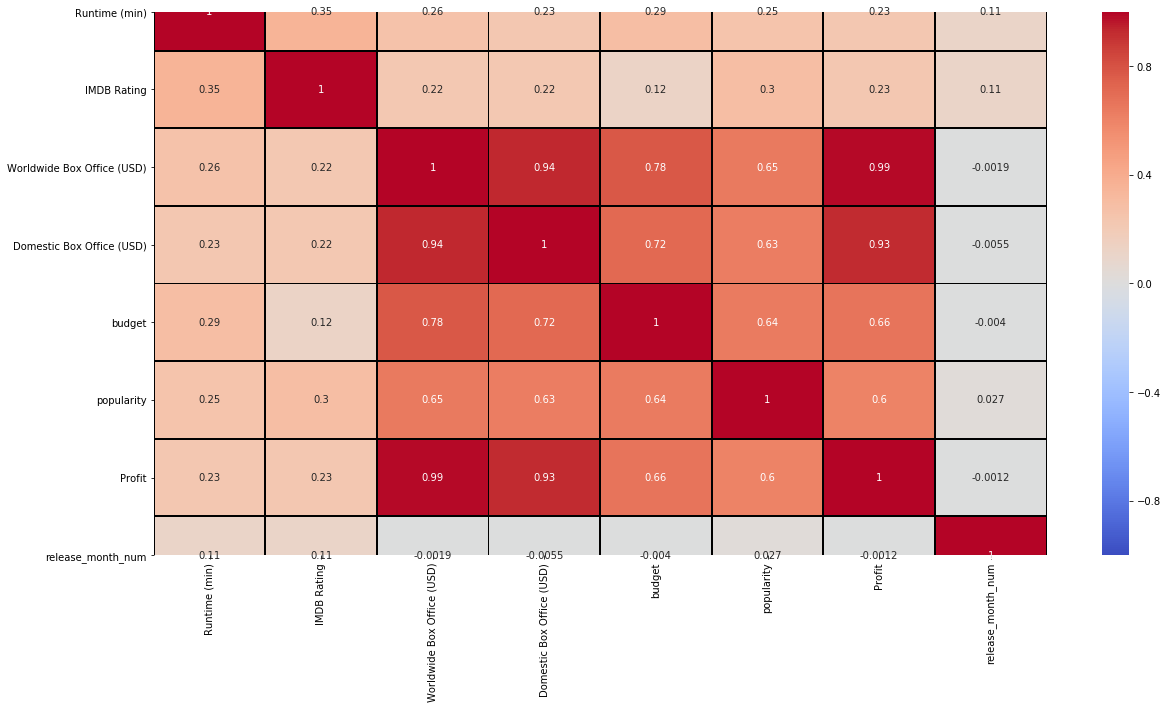

In [13]:
# Heatmap 
fig3, ax = plt.subplots(figsize=(20,10))

df = sns.heatmap(df3.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm', linewidths=1, linecolor='black' );